In [34]:
import wntr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [35]:
inp_file='/home/wahab901278/Downloads/Net3.inp'

In [36]:
wn=wntr.network.WaterNetworkModel(inp_file)

In [37]:
contaminant_node='125'
contaminant_concentration=100.0
start_time=2*3600
duration=2*3600

In [38]:
help(wn.add_source)

Help on method add_source in module wntr.network.model:

add_source(name, node_name, source_type, quality, pattern=None) method of wntr.network.model.WaterNetworkModel instance
    Adds a source to the water network model
    
    Parameters
    ----------
    name : string
        Name of the source
    
    node_name: string
        Injection node.
    
    source_type: string
        Source type, options = CONCEN, MASS, FLOWPACED, or SETPOINT
    
    quality: float
        Source strength in Mass/Time for MASS and Mass/Volume for CONCEN, 
        FLOWPACED, or SETPOINT
    
    pattern: string or Pattern object
        Pattern name or object



In [39]:
wn.add_source('ContaminantSource',node_name=contaminant_node,source_type='MASS',quality=contaminant_concentration)

In [40]:
sim=wntr.sim.EpanetSimulator(wn)
results=sim.run_sim()

In [41]:
concentration=results.node['quality']

In [42]:
concentration

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,100.0,0.000000e+00,0.000000e+00,0.0
3600,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,100.0,0.000000e+00,0.000000e+00,0.0
7200,100.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,100.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,100.0,0.000000e+00,0.000000e+00,0.0
10800,100.0,0.000000,0.0,0.000001,0.000119,4.054435e-11,0.0,0.0,0.0,100.000000,...,0.159886,0.000003,0.000002,3.169057e-07,2.940837e-07,0.0,100.0,2.439446e-07,1.686003e-15,0.0
14400,100.0,0.000007,0.0,0.025872,21.653755,1.981019e-06,0.0,0.0,0.0,100.000000,...,88.266563,0.075779,0.048771,5.758538e-04,5.628630e-04,0.0,100.0,3.358877e-04,5.428158e-10,0.0
18000,100.0,0.000136,0.0,3.250508,65.022690,3.471983e-04,0.0,0.0,0.0,100.000000,...,94.603256,49.970524,5.187201,8.032590e-01,8.096046e-01,0.0,100.0,9.321949e-01,8.157114e-07,0.0
21600,100.0,0.000175,0.0,15.276230,90.524757,1.223807e-03,0.0,0.0,0.0,100.000000,...,98.686546,41.772022,15.662642,6.680266e+00,4.448805e+00,0.0,100.0,2.359415e+00,7.946052e-06,0.0
25200,100.0,0.000186,0.0,16.354357,88.962090,2.777217e+01,0.0,0.0,0.0,100.000000,...,99.975182,52.070805,16.380816,1.176218e+01,9.569348e+00,0.0,100.0,4.812453e+00,2.308235e-05,0.0
28800,100.0,0.000186,0.0,17.939573,99.936806,4.351043e+01,0.0,0.0,0.0,100.000000,...,99.992432,29.896046,14.363072,1.267201e+01,1.225720e+01,0.0,100.0,6.311318e+00,2.980746e-05,0.0
32400,100.0,0.000186,0.0,14.496498,99.990524,6.475635e+01,0.0,0.0,0.0,100.000000,...,99.991386,39.977180,13.962946,1.045933e+01,1.144972e+01,0.0,100.0,8.179620e+00,3.856141e-05,0.0


In [43]:
available_nodes=concentration.columns.tolist()

In [44]:
available_nodes

['10',
 '15',
 '20',
 '35',
 '40',
 '50',
 '60',
 '601',
 '61',
 '101',
 '103',
 '105',
 '107',
 '109',
 '111',
 '113',
 '115',
 '117',
 '119',
 '120',
 '121',
 '123',
 '125',
 '127',
 '129',
 '131',
 '139',
 '141',
 '143',
 '145',
 '147',
 '149',
 '151',
 '153',
 '157',
 '159',
 '161',
 '163',
 '164',
 '166',
 '167',
 '169',
 '171',
 '173',
 '177',
 '179',
 '181',
 '183',
 '184',
 '185',
 '187',
 '189',
 '191',
 '193',
 '195',
 '197',
 '199',
 '201',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '211',
 '213',
 '215',
 '217',
 '219',
 '225',
 '229',
 '231',
 '237',
 '239',
 '241',
 '243',
 '247',
 '249',
 '251',
 '253',
 '255',
 '257',
 '259',
 '261',
 '263',
 '265',
 '267',
 '269',
 '271',
 '273',
 '275',
 'River',
 'Lake',
 '1',
 '2',
 '3']

In [45]:
sensor_locations=['119',
 '120',
 '121',
 '123',
'263']
sensor_location=[node for node in sensor_locations if node in available_nodes]


In [46]:
observed_data=concentration.loc[start_time+duration:,sensor_locations].max(axis=0)

In [47]:
observed_data

name
119      9.766678
120     89.320877
121      0.000000
123      0.000000
263    100.000000
dtype: float32

In [48]:
def objective(x,sensor_locations,observed_data,wn,start_time,duration):
    for i, node in enumerate(sensor_locations):
        wn.add_source(f'Source_{i}',node_name=node,source_type='MASS',quality=x[i])
    sim=wntr.sim.EpanetSimulator(wn)
    results=sim.run_sim()
    sim_data=results.node['quality'].loc[start_time+duration:,sensor_locations].max(axis=0)
    wn.reset_initial_values()
    return np.sum((sim_data-observed_data)**2)

In [49]:
initial_guess=np.ones(len(sensor_location))*10

In [50]:
initial_guess

array([10., 10., 10., 10., 10.])

In [51]:
result=minimize(objective,initial_guess,args=(sensor_location,observed_data,wn,start_time,duration),method='L-BFGS-B')

In [52]:
result

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.0
        x: [ 1.000e+01  1.000e+01  1.000e+01  1.000e+01  1.000e+01]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
     nfev: 6
     njev: 1
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

In [53]:
potential_sources=[sensor_locations[i] for i in range(len(sensor_locations)) if result.x[i]>0.1]

In [54]:
print('Potential Contamination sources based on optimization:')
print(potential_sources)

Potential Contamination sources based on optimization:
['119', '120', '121', '123', '263']


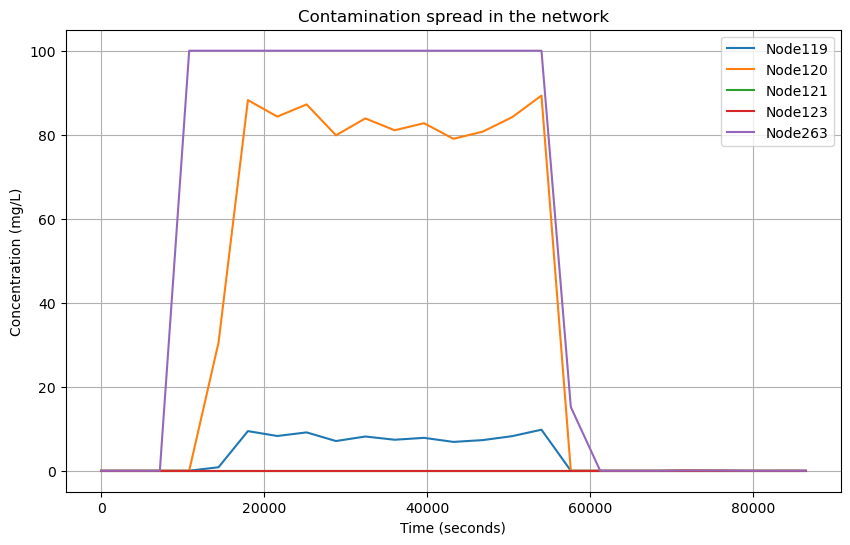

In [55]:
plt.figure(figsize=(10,6))
for node in sensor_locations:
    plt.plot(concentration.index,concentration[node],label=f'Node{node}')
plt.title('Contamination spread in the network')
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration (mg/L)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()